In [71]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [75]:
# reading the data and looking at the first five rows of the data
data=pd.read_excel(r"C:\Users\sai\OneDrive\Documents\EastWestAirlines.xlsx")
data.head()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN


In [77]:
data.nunique()

East-West Airlines is trying to learn more about its customers.  Key issues are their    18
Unnamed: 1                                                                                3
Unnamed: 2                                                                                3
Unnamed: 3                                                                                3
Unnamed: 4                                                                               18
dtype: int64

In [79]:
data.shape

(26, 5)

In [81]:
# statistics of the data
data.describe()

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,18,13,6,13,18
unique,18,3,3,3,18
top,"flying patterns, earning and use of frequent f...",NUMBER,1,Raw,Description
freq,1,9,3,9,1


In [99]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(data.isnull().sum())
print(data.dtypes)
data = data.apply(pd.to_numeric, errors='coerce')


East-West Airlines is trying to learn more about its customers.  Key issues are their     8
Unnamed: 1                                                                               13
Unnamed: 2                                                                               20
Unnamed: 3                                                                               13
Unnamed: 4                                                                                8
dtype: int64
East-West Airlines is trying to learn more about its customers.  Key issues are their    object
Unnamed: 1                                                                               object
Unnamed: 2                                                                               object
Unnamed: 3                                                                               object
Unnamed: 4                                                                               object
dtype: object


In [193]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Convert the scaled data to a DataFrame and describe it
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
print(df_scaled)

    East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0                                                 NaN                                       
1                                                 NaN                                       
2                                                 NaN                                       
3                                                 NaN                                       
4                                                 NaN                                       
5                                                 NaN                                       
6                                                 NaN                                       
7                                                 NaN                                       
8                                                 NaN                                       
9                                                 NaN                 

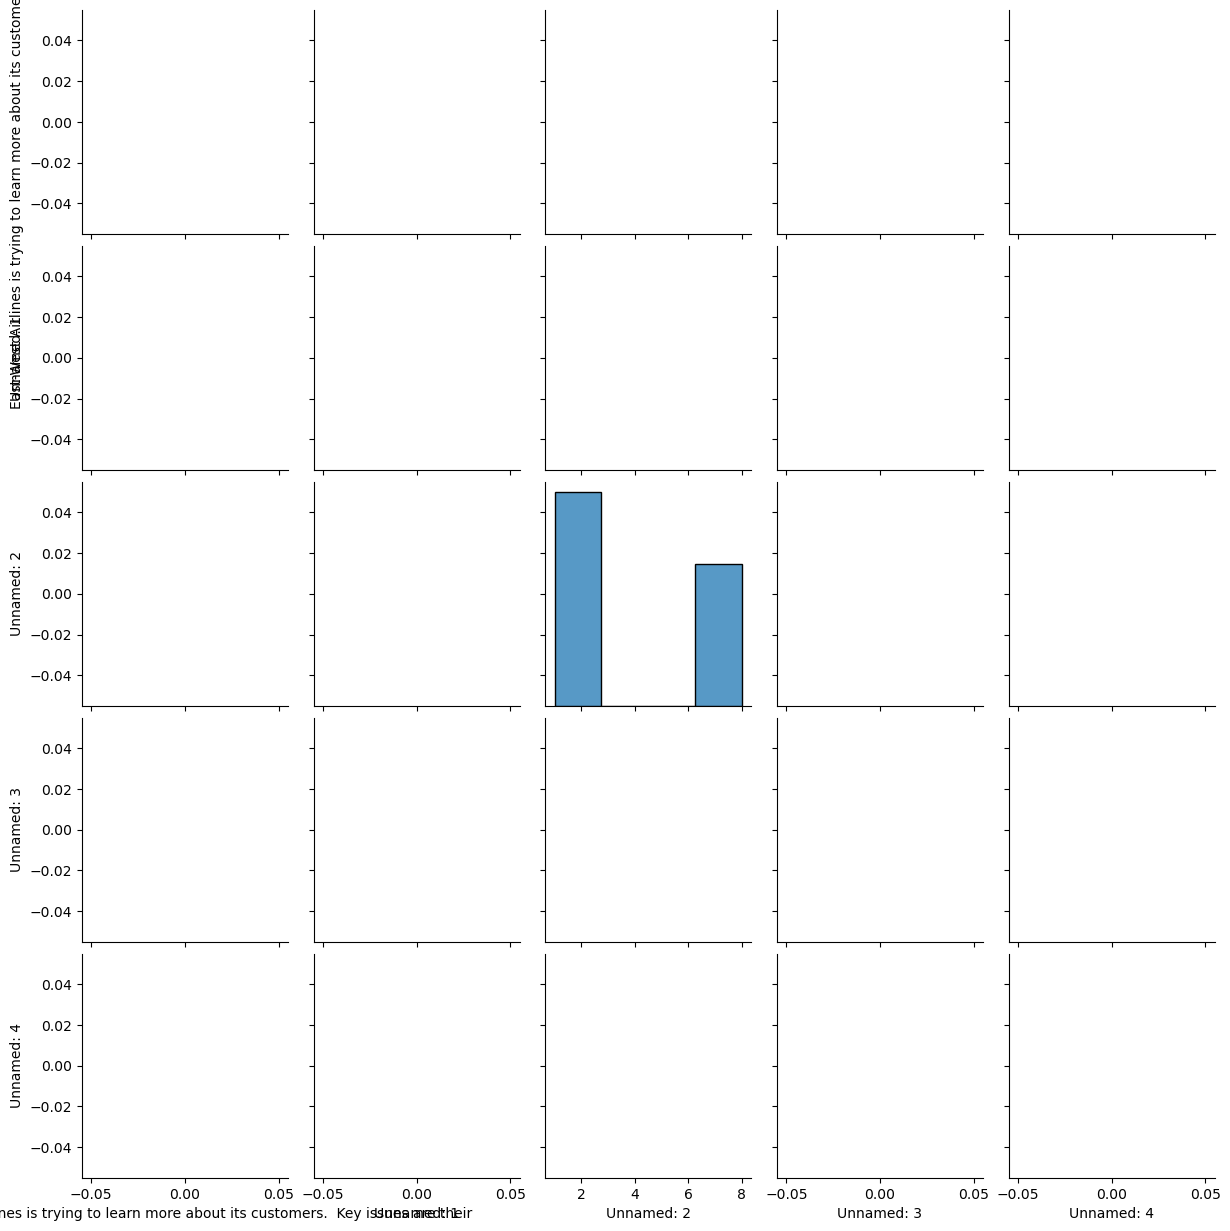

In [198]:
import seaborn as sns
sns.pairplot(data)

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [220]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

# Load the dataset
file_path = r"C:\Users\sai\OneDrive\Documents\EastWestAirlines.xlsx"

# Data Preprocessing
# Handle missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'bifc' else x)

# Remove outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Scale the features
scaler = StandardScaler()
df_scaled =pd.DataFrame(data_scaled, columns=df.columns)

# Check for NaNs in scaled data
if np.any(np.isnan(df_scaled)):
    print("NaN values detected in scaled data. Handling NaNs.")
    # Impute NaNs if any (though ideally, they should not be present if preprocessing was done correctly)
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df_scaled = imputer.fit_transform(df_scaled)

# Define the K-Means model with initialization method as K-Means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)

# Fit the K-Means model on the scaled data
kmeans.fit(df_scaled)

# Retrieve cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

print("Cluster Centers:\n", cluster_centers)
print("Labels:\n", labels)


NaN values detected in scaled data. Handling NaNs.
Cluster Centers:
 [[-0.10206207]
 [ 1.22474487]]
Labels:
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'SSE')

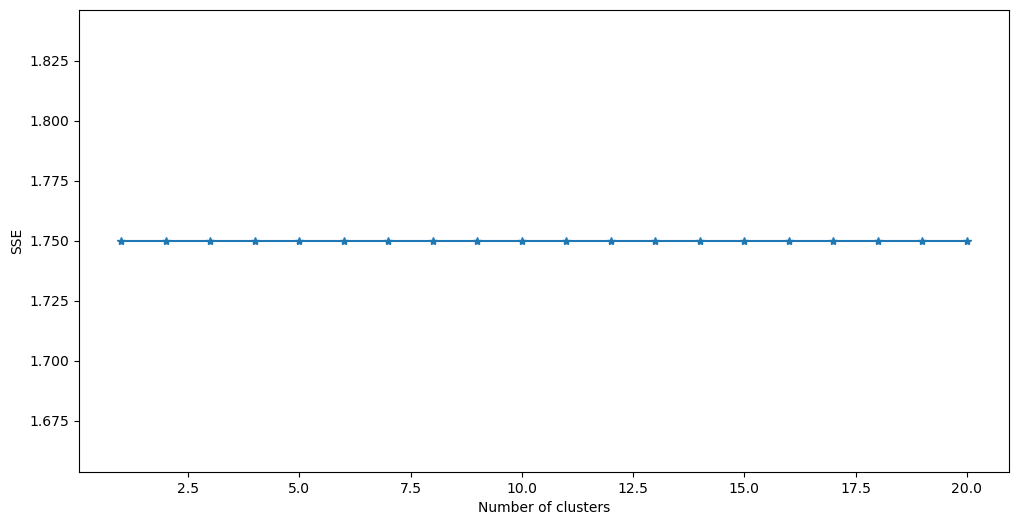

In [224]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)
# print(SSE)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,21), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='*')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [226]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 6, init='random',n_init = 'auto')
kmeans.fit(df_scaled)
print(kmeans.inertia_)
y_pred = kmeans.fit_predict(df_scaled)
np.unique(y_pred)

2.0000000000000018


array([0, 1, 2])

In [246]:
import matplotlib.pyplot as plt

# Check the shape of df_scaled to ensure correct indexing
print("Shape of df_scaled:", df_scaled.shape)

# Example of correct plotting with available features
# Assuming df_scaled has only 2 features after scaling
if df_scaled.shape[1] == 2:
    plt.figure(figsize=(7,5))
    plt.scatter(df_scaled[y_pred == 0, 0], df_scaled[y_pred == 0, 1], s=50, c='y', label='Cluster 0')
    plt.scatter(df_scaled[y_pred == 1, 0], df_scaled[y_pred == 1, 1], s=50, c='g', label='Cluster 1')
    plt.scatter(df_scaled[y_pred == 2, 0], df_scaled[y_pred == 2, 1], s=50, c='b', label='Cluster 2')
    # Add more clusters as needed
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clusters Visualization')
    plt.legend()
    plt.show()


Shape of df_scaled: (26, 1)
